In [0]:
import pandas as pd
import io,csv
import requests
import matplotlib.pyplot as plt
import numpy
import gzip
import seaborn as sns
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [0]:
uploaded = files.upload()

Saving top50spotify2019.csv to top50spotify2019 (6).csv


In [0]:
ds = pd.read_csv('top50spotify2019.csv', encoding='ISO-8859-1', sep=',')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [0]:
ds.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [0]:
ds.dtypes

Unnamed: 0           int64
Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

In [0]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,50.0,25.50,14.577380,1.0,13.25,25.5,37.75,50.0
Beats.Per.Minute,50.0,120.06,30.898392,85.0,96.00,104.5,137.50,190.0
Energy,50.0,64.06,14.231913,32.0,55.25,66.5,74.75,88.0
Danceability,50.0,71.38,11.929880,29.0,67.00,73.5,79.75,90.0
Loudness..dB..,50.0,-5.66,2.056448,-11.0,-6.75,-6.0,-4.00,-2.0
Liveness,50.0,14.66,11.118306,5.0,8.00,11.0,15.75,58.0
Valence.,50.0,54.60,22.336024,10.0,38.25,55.5,69.50,95.0
Length.,50.0,200.96,39.143879,115.0,176.75,198.0,217.50,309.0
Acousticness..,50.0,22.16,18.995553,1.0,8.25,15.0,33.75,75.0
Speechiness.,50.0,12.48,11.161596,3.0,5.00,7.0,15.00,46.0


In [0]:
cat_col = [var for var in ds.columns if ds[var].dtype == 'O']
ds.loc[:,cat_col].head()

,Track.Name,Artist.Name,Genre
0,Señorita,Shawn Mendes,canadian pop
1,China,Anuel AA,reggaeton flow
2,boyfriend (with Social House),Ariana Grande,dance pop
3,Beautiful People (feat. Khalid),Ed Sheeran,pop
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap


In [0]:
num_col = [var for var in ds.columns if ds[var].dtype != 'O']
ds.loc[:, num_col].head(3)

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,117,55,76,-6,8,75,191,4,3,79
1,2,105,81,79,-4,8,61,302,8,9,92
2,3,190,80,40,-4,16,70,186,12,46,85


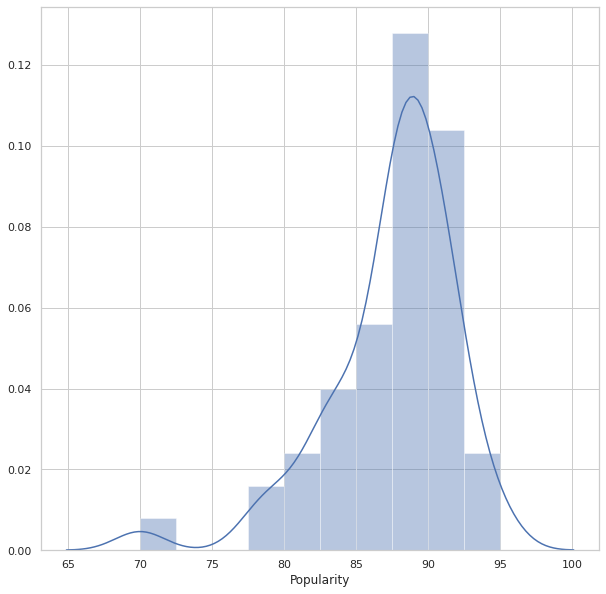

In [0]:
plt.figure(figsize = (10,10))
sns.set(style = "whitegrid")
f = sns.distplot(ds["Popularity"])

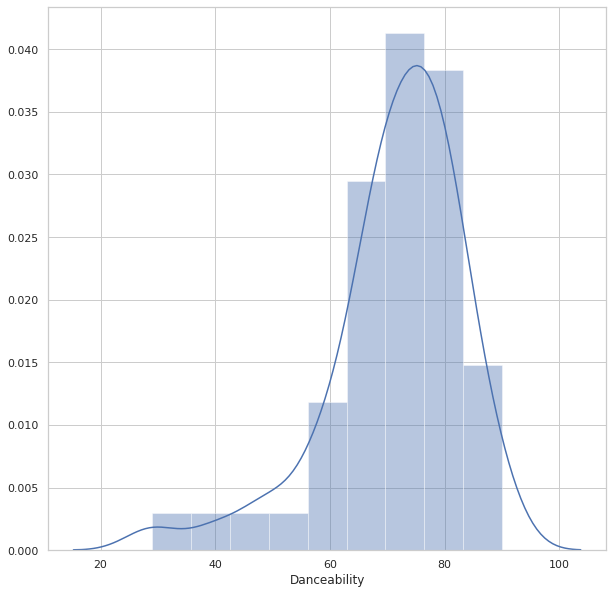

In [0]:
plt.figure(figsize = (10,10))
sns.set(style = "whitegrid")
f = sns.distplot(ds["Danceability"])

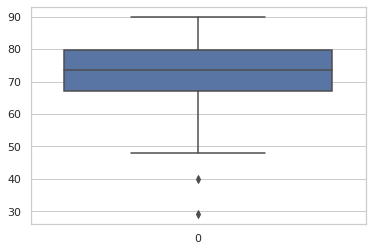

In [0]:
sns.boxplot(data=ds["Danceability"]);

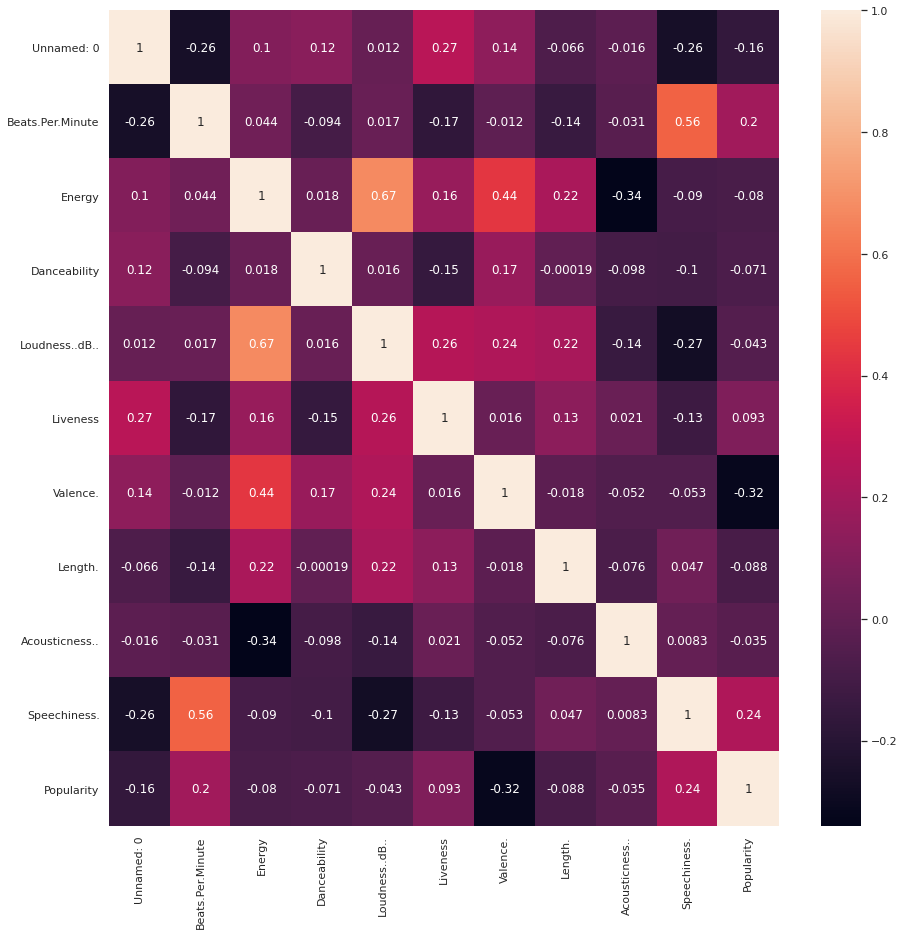

In [0]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(ds.corr(), annot=True)

In [0]:
x = ds[['Popularity', 'Danceability','Liveness','Acousticness..', 'Energy']]
y = ds["Genre"]

In [0]:
x = x.fillna(method='ffill')
y = y.fillna(method='ffill')

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [0]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [0]:
modelo_regressaoLog = LogisticRegression(C = 0.7, random_state = 42)
modelo_regressaoLog.fit(x_train, y_train.ravel())

regressao_log_predict_test = modelo_regressaoLog.predict(x_test)

In [0]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_test, regressao_log_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, regressao_log_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.0667

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0

